# Photo-Realistic Style Transfer

In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from src.transfer_style import Stylizer
from src.optimizers import Adam
from src.callback import Callback

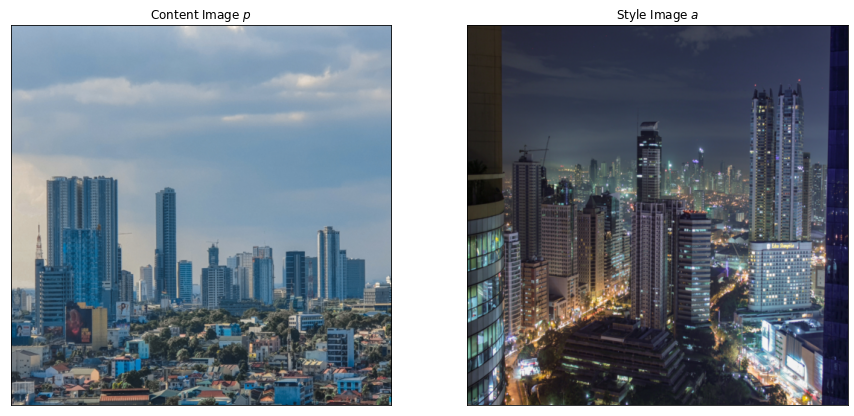

In [11]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
content = io.imread('img/content/qc.jpg')
content = T.resize(content, (512, 512), preserve_range=True).astype('uint8')
ax = plt.imshow(content)

plt.title('Content Image $p$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.subplot(1, 2, 2)

style = io.imread('img/content/manila-city.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
plt.title('Style Image $a$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

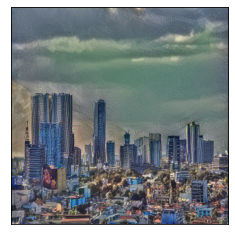

100%|██████████| 150/150 [12:41<00:00,  5.07s/it]


In [12]:
output = Stylizer('block3_conv2', content_weight=10, style_weight=1000)(
    content=content,
    style=style,
    optimize=Adam(learning_rate=1e2),
    iterations=150,
    callback=Callback('build/photo-realistic-style-transfer/styleW1000contentW10')
)
io.imsave('img/photo-realistic-style-transfer/manila-skyline_night-1000style10content.jpg', output)

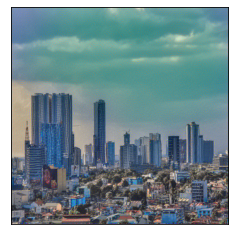

100%|██████████| 150/150 [12:24<00:00,  4.96s/it]


In [10]:
output = Stylizer('block3_conv2', content_weight=100, style_weight=1000)(
    content=content,
    style=style,
    optimize=Adam(learning_rate=1e2),
    iterations=150,
    callback=Callback('build/photo-realistic-style-transfer/styleW1000contentW100')
)
io.imsave('img/photo-realistic-style-transfer/manila-skyline_night-1000style100content.jpg', output)